In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/paysim1/PS_20174392719_1491204439457_log.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
# Summary statistics for numerical columns
data.describe()

# Count unique values for categorical columns
data[['type', 'nameOrig', 'nameDest']].nunique()


type              5
nameOrig    6353307
nameDest    2722362
dtype: int64

In [5]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


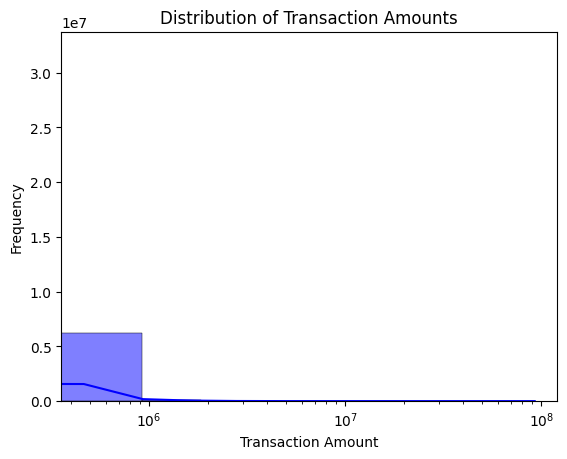

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of transaction amounts
sns.histplot(data['amount'], bins=100, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.xscale('log')  # Use log scale for better visualization
plt.show()


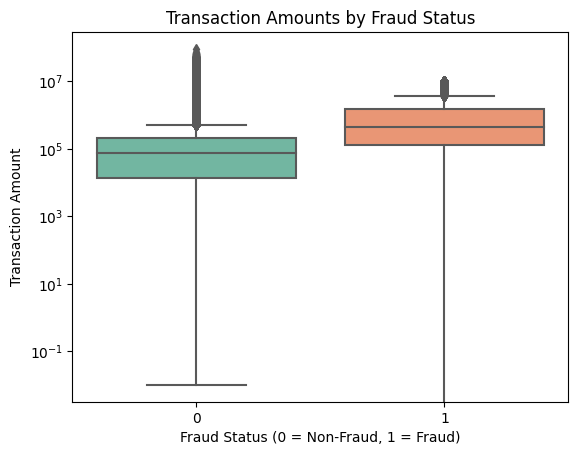

In [7]:
# Boxplot: Transaction Amount by Fraud Status
sns.boxplot(x='isFraud', y='amount', data=data, palette='Set2')
plt.title('Transaction Amounts by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Use log scale for better clarity
plt.show()


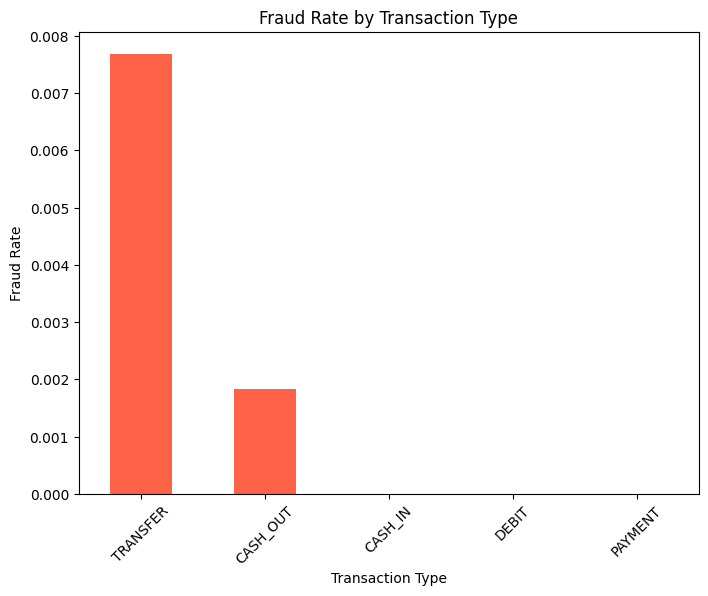

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


In [8]:
# Fraud rate by transaction type
fraud_by_type = data.groupby('type')['isFraud'].mean().sort_values(ascending=False)

# Plot the fraud rates
fraud_by_type.plot(kind='bar', color='tomato', figsize=(8, 6))
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

# Display the fraud rate table
print(fraud_by_type)


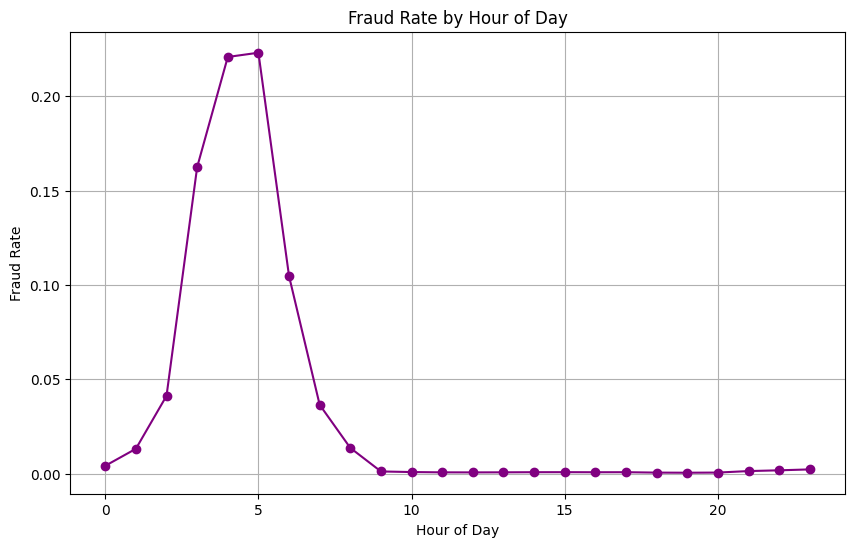

hour
0     0.004191
1     0.013205
2     0.041251
3     0.162431
4     0.220790
5     0.223035
6     0.104678
7     0.036493
8     0.013673
9     0.001203
10    0.000881
11    0.000726
12    0.000701
13    0.000739
14    0.000803
15    0.000818
16    0.000781
17    0.000802
18    0.000591
19    0.000528
20    0.000614
21    0.001400
22    0.001804
23    0.002287
Name: isFraud, dtype: float64


In [9]:
# Extract hour from 'step'
data['hour'] = data['step'] % 24

# Calculate fraud rate by hour
fraud_by_hour = data.groupby('hour')['isFraud'].mean()

# Plot fraud rate by hour
fraud_by_hour.plot(kind='line', marker='o', figsize=(10, 6), color='purple')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.grid()
plt.show()

# Display fraud rate table
print(fraud_by_hour)


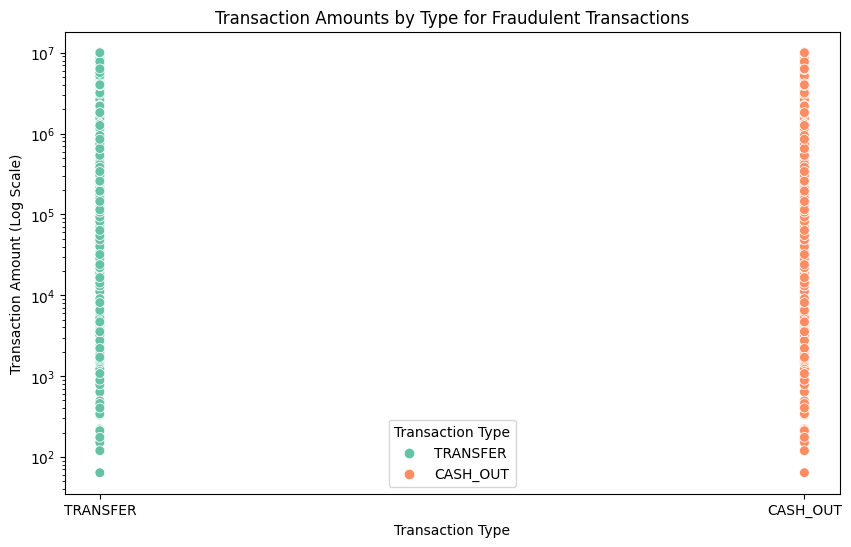

In [10]:
import matplotlib.pyplot as plt

# Filter fraudulent transactions
fraud_transactions = data[data['isFraud'] == 1]

# Scatter plot: Transaction Amount vs Type for Fraudulent Transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='type', y='amount', data=fraud_transactions, hue='type', palette='Set2', s=50)
plt.title('Transaction Amounts by Type for Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount (Log Scale)')
plt.yscale('log')
plt.legend(title='Transaction Type')
plt.show()


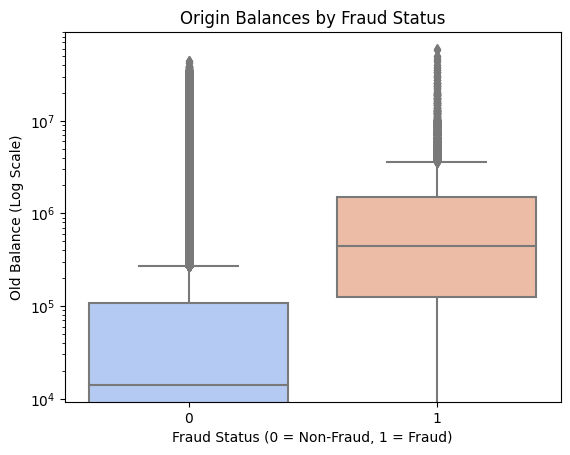

In [12]:
# Boxplot: Origin Balances by Fraud Status
sns.boxplot(x='isFraud', y='oldbalanceOrg', data=data, palette='coolwarm')
plt.title('Origin Balances by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Old Balance (Log Scale)')
plt.yscale('log')  # Log scale for better visualization
plt.show()


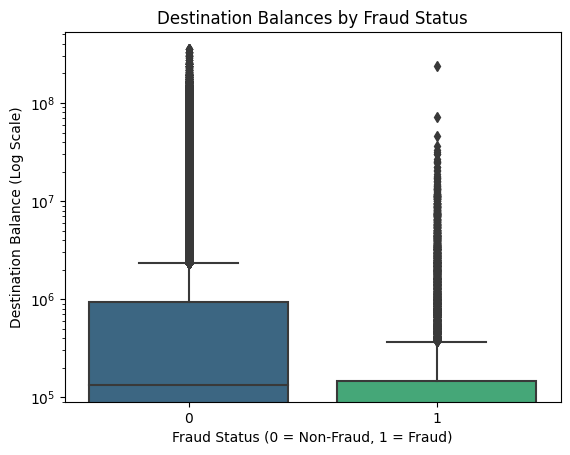

In [13]:
# Boxplot: Destination Balances by Fraud Status
sns.boxplot(x='isFraud', y='oldbalanceDest', data=data, palette='viridis')
plt.title('Destination Balances by Fraud Status')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Destination Balance (Log Scale)')
plt.yscale('log')  # Log scale for better visualization
plt.show()


In [14]:
# Save the cleaned dataset for Tableau
data.to_csv('cleaned_fraud_data.csv', index=False)
